In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score



In [46]:
#Step 1: Dataset Loading and Inspection
df=pd.read_csv("insurance.csv")
df
"""4. Identify:
o Target variable
o Feature variables"""
#Target variable  is medical charges i.e column charges which we have to predict
"""#- age
- sex
- bmi
- children
- smoker
- region
These are the independent variables used to estimate the insurance charges."""


'#- age\n- sex\n- bmi\n- children\n- smoker\n- region\nThese are the independent variables used to estimate the insurance charges.'

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1367 non-null   float64
 1   sex       1367 non-null   object 
 2   bmi       1367 non-null   float64
 3   children  1438 non-null   int64  
 4   smoker    1438 non-null   object 
 5   region    1367 non-null   object 
 6   charges   1438 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 78.8+ KB


In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,NaN,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [49]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1433,24.0,male,19.5,5,yes,southwest,45255.58
1434,26.0,female,24.2,4,no,southwest,4181.43
1435,41.0,female,33.6,5,no,northeast,15486.23
1436,18.0,male,33.0,1,no,northeast,47619.75
1437,61.0,female,22.7,1,no,northwest,44732.66


In [50]:
df.describe()

,age,bmi,children,charges
count,1367.000000,1367.000000,1438.000000,1438.000000
mean,39.389905,30.466240,1.197497,14263.806370
std,14.025264,6.177811,1.307840,12869.081884
min,18.000000,15.000000,0.000000,1121.873900
25%,27.000000,26.030000,0.000000,4908.572200
50%,40.000000,30.250000,1.000000,9794.877050
75%,51.000000,34.457500,2.000000,19135.377290
max,64.000000,53.130000,5.000000,63770.428010


In [51]:
df.describe(include='object')

,sex,smoker,region
count,1367,1438,1367
unique,2,2,4
top,male,no,southeast
freq,699,1118,369


In [52]:
df.isnull().sum()

age         71
sex         71
bmi         71
children     0
smoker       0
region      71
charges      0
dtype: int64

In [53]:
#only missing values
df.isnull().sum()[df.isnull().sum()>0]

age       71
sex       71
bmi       71
region    71
dtype: int64

In [54]:
df.shape

(1438, 7)

In [55]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [56]:
numeric_df=df.select_dtypes(include=[np.number])
numeric_df.isnull().sum()

age         71
bmi         71
children     0
charges      0
dtype: int64

In [57]:
for col in numeric_df:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)


C:\Users\amnas\AppData\Local\Temp\ipykernel_30552\2045502455.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [58]:
numeric_df

,age,bmi,children,charges
0,19.0,27.900,0,16884.92400
1,18.0,33.770,1,1725.55230
2,28.0,33.000,3,4449.46200
3,33.0,22.705,0,21984.47061
4,32.0,28.880,0,3866.85520
...,...,...,...,...
1433,24.0,19.500,5,45255.58000
1434,26.0,24.200,4,4181.43000
1435,41.0,33.600,5,15486.23000
1436,18.0,33.000,1,47619.75000


In [59]:
numeric_df.isnull().sum()

age         71
bmi         71
children     0
charges      0
dtype: int64

In [60]:
cat_df=df.select_dtypes(include='object')
for col in cat_df:
    if df[col].dtype in ['object','category']:
        df[col]=df[col].fillna(df[col].mode()[0])
cat_df


,sex,smoker,region
0,NaN,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1433,male,yes,southwest
1434,female,no,southwest
1435,female,no,northeast
1436,male,no,northeast


In [61]:
cat_df.isnull().sum()

sex       71
smoker     0
region    71
dtype: int64

In [62]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [102]:
df=pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,True,True,False,False,True
1,18.0,33.770,1,1725.55230,True,False,False,True,False
2,28.0,33.000,3,4449.46200,True,False,False,True,False
3,33.0,22.705,0,21984.47061,True,False,True,False,False
4,32.0,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1433,24.0,19.500,5,45255.58000,True,True,False,False,True
1434,26.0,24.200,4,4181.43000,False,False,False,False,True
1435,41.0,33.600,5,15486.23000,False,False,False,False,False
1436,18.0,33.000,1,47619.75000,True,False,False,False,False


In [103]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,16884.92400,True,True,False,False,True
1,18.0,33.770,1,1725.55230,True,False,False,True,False
2,28.0,33.000,3,4449.46200,True,False,False,True,False
3,33.0,22.705,0,21984.47061,True,False,True,False,False
4,32.0,28.880,0,3866.85520,True,False,True,False,False


In [104]:
x=df.drop(columns=['charges'])
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0,True,True,False,False,True
1,18.0,33.770,1,True,False,False,True,False
2,28.0,33.000,3,True,False,False,True,False
3,33.0,22.705,0,True,False,True,False,False
4,32.0,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1433,24.0,19.500,5,True,True,False,False,True
1434,26.0,24.200,4,False,False,False,False,True
1435,41.0,33.600,5,False,False,False,False,False
1436,18.0,33.000,1,True,False,False,False,False


In [105]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1433    45255.58000
1434     4181.43000
1435    15486.23000
1436    47619.75000
1437    44732.66000
Name: charges, Length: 1438, dtype: float64

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
538,46.0,28.05000,1,False,False,False,True,False
174,24.0,33.34500,0,False,False,True,False,False
1390,24.0,23.70000,0,False,True,False,False,True
303,28.0,33.00000,2,False,False,False,True,False
1128,34.0,32.80000,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...
1095,18.0,31.35000,4,False,False,False,False,False
1130,39.0,23.87000,5,False,False,False,True,False
1294,58.0,25.17500,0,True,False,False,False,False
860,37.0,47.60000,2,False,True,False,False,True


In [107]:
x_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
51,21.0,33.630,2,False,False,True,False,False
1322,62.0,38.830,0,True,False,False,True,False
923,34.0,35.815,0,True,False,True,False,False
1302,25.0,20.800,1,False,False,False,False,True
701,50.0,44.745,0,False,False,False,False,False
...,...,...,...,...,...,...,...,...
471,18.0,30.115,0,False,False,False,False,False
1384,26.0,32.400,3,False,True,True,False,False
221,53.0,33.250,0,False,False,False,False,False
113,21.0,35.720,0,False,False,True,False,False


In [108]:
y_train

538      8233.09750
174      2855.43755
1390    19965.00000
303      4349.46200
1128    14358.36437
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1150, dtype: float64

In [109]:
y_test

51       3579.82870
1322    12981.34570
923      4320.41085
1302     3208.78700
701      9541.69555
           ...     
471      2203.47185
1384     5492.62000
221     10564.88450
113      2404.73380
528      8342.90875
Name: charges, Length: 288, dtype: float64

In [110]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [111]:
model.fit(x_train,y_train)

LinearRegression()

In [112]:
y_pred=model.predict(x_test)
y_pred

array([ 6170.00491709, 16094.7167661 ,  7986.27925707,  2643.43755191,
       14796.93523946,  3462.02875655, 12717.93824163, 30698.2194064 ,
        5459.97058517,  6709.81888569,  7579.90142594, 10937.76111795,
       31081.33404447, 11289.53622302, 13801.14676652, 10438.74342943,
        5268.25185016,  8915.18528997,  9245.91640704, 13349.73051677,
        7371.65793133,  6940.73994338, 11931.80371042, 32161.33968973,
       11561.36435352,  2238.04777201, 12449.69197705,  9747.50696383,
       12513.86866662, 14803.48258965, 27570.39935014,  4220.96864454,
       10248.20422581, 14007.42123523,  8490.5664194 ,  4973.35935803,
       32387.31499971,  2515.89743335,  7464.15997005,  7452.95133374,
       12281.90350858, 10910.32757591,  8348.20524106, 10694.17219409,
       12490.65816325, 34203.9104785 , 27569.5407706 ,  7755.75845784,
        8503.53682307,  8856.60367593,  9603.70675413,  6578.6082492 ,
       12007.35490339, 11536.19938745,  6205.83725202,  3873.34619931,
      

In [113]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'MAE':y_test-y_pred})

,y_test,y_pred,MAE
51,3579.82870,6170.004917,-2590.176217
1322,12981.34570,16094.716766,-3113.371066
923,4320.41085,7986.279257,-3665.868407
1302,3208.78700,2643.437552,565.349448
701,9541.69555,14796.935239,-5255.239689
...,...,...,...
471,2203.47185,3453.175989,-1249.704139
1384,5492.62000,29392.338025,-23899.718025
221,10564.88450,12851.043810,-2286.159310
113,2404.73380,4461.788863,-2057.055063


In [114]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", MAE)
print("R² Score:", r2)

MSE: 64162010.45537314
RMSE: 8010.119253505102
MAE: 5520.292895794374
R² Score: 0.6532806395529653


In [115]:
x_test.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [116]:
model.predict([[50.0,44.745,0,False,False,False,True,True]])

C:\Users\amnas\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12760.9750735])

In [117]:
#predicted medical charges :12760.9750735

In [118]:
"""Feature scaling is important because it:
- Prevents domination by large‑scale features
- Speeds up and stabilizes gradient descent
- Improves regularization
- Reduces numerical issues
- Makes coefficients easier to interpret
 """


'Feature scaling is important because it:\n- Prevents domination by large‑scale features\n- Speeds up and stabilizes gradient descent\n- Improves regularization\n- Reduces numerical issues\n- Makes coefficients easier to interpret\n '

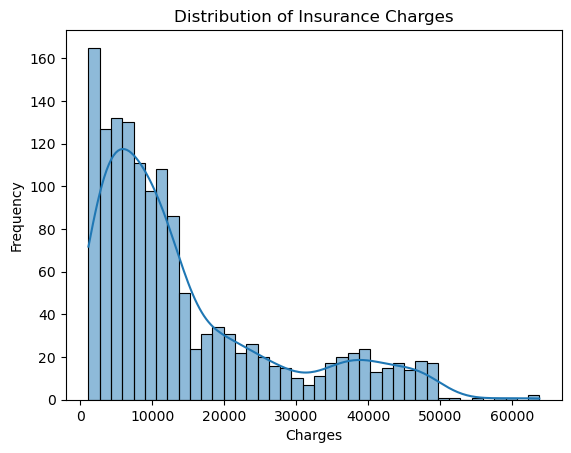

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde=True, bins=40)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


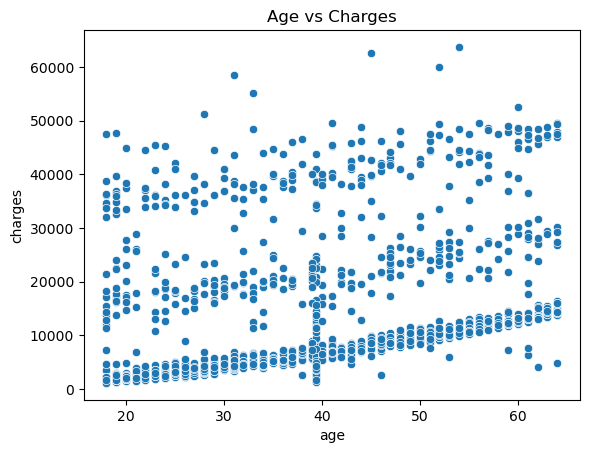

In [120]:
sns.scatterplot(data=df, x='age', y='charges')
plt.title("Age vs Charges")
plt.show()


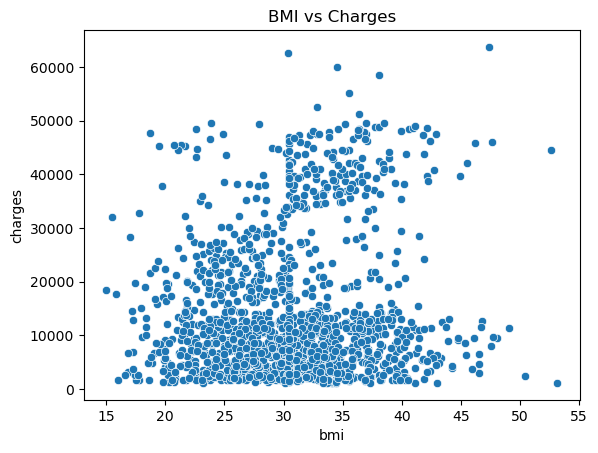

In [80]:
sns.scatterplot(data=df, x='bmi', y='charges')
plt.title("BMI vs Charges")
plt.show()


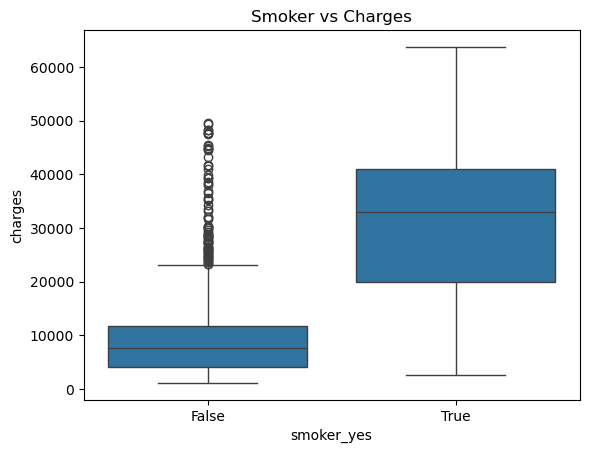

In [81]:
sns.boxplot(data=df, x='smoker_yes', y='charges')
plt.title("Smoker vs Charges")
plt.show()


In [ ]:
""" Two Key Insights From the EDA
Insight 1:
Smokers consistently show extremely high medical charges.
This single variable explains a large portion of the variance in the target.
Insight2 
Age and BMI also significantly influence charges
- Older individuals tend to have higher charges.
- High BMI, especially combined with smoking, leads to very high medical costs."""


In [ ]:
"""Evaluate the model on the test dataset using:
• Mean Absolute Error (MAE)
• Mean Squared Error (MSE)
• Root Mean Squared Error (RMSE)
• R-squared (R2)
Explain what each metric indicates about model performance."""
"""MSE: 64162010.45537314
RMSE: 8010.119253505102
MAE: 5520.292895794374
R² Score: 0.6532806395529653"""
#- model explains 65.3% of the variation in medical charges.
#- this model is not underfitting, but it’s also not capturing all the complexity in the data.

